 ## **Load the Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **EDA**

In [3]:
df.shape

(918, 12)

In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(col)
        print(df[col].unique(), "\n")

Sex
['M' 'F'] 

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] 

FastingBS
[0 1] 

RestingECG
['Normal' 'ST' 'LVH'] 

ExerciseAngina
['N' 'Y'] 

ST_Slope
['Up' 'Flat' 'Down'] 

HeartDisease
[0 1] 



## **EDA with visualizations**

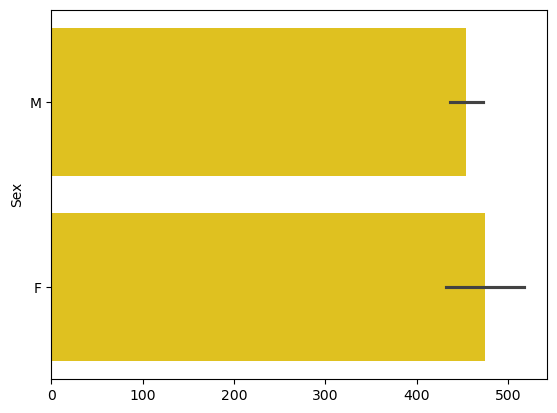

In [8]:
sns.barplot(data=df["Sex"], color="gold")
plt.show()

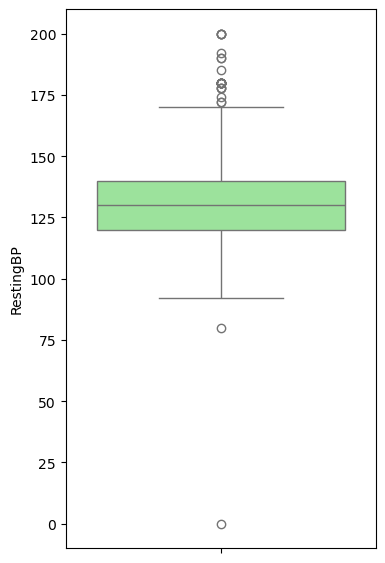

In [9]:
plt.figure(figsize=(4, 7))
sns.boxplot(data=df["RestingBP"], color="lightgreen")
plt.show()

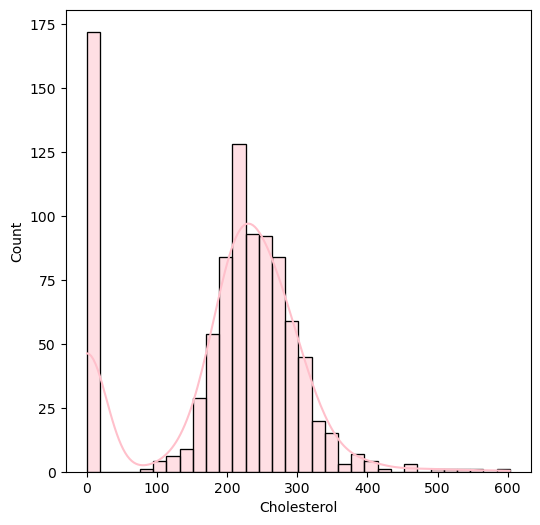

In [10]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df["Cholesterol"], color="pink", kde=True)
plt.show()

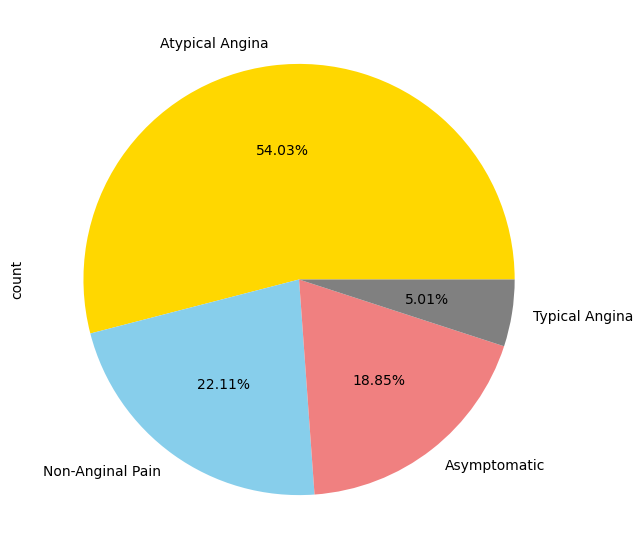

In [11]:
chest_pain_count = df["ChestPainType"].value_counts()
plt.figure(figsize=(7, 7))

chest_pain_count.plot(kind="pie",
                      labels=['Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic', 'Typical Angina'],
                      colors=["gold", "skyblue", "lightcoral", "gray"],
                      autopct="%.2f%%")

plt.show()